# Смотрим на рекоммендательную систему

### Импортируем зависимости

In [1]:
from recommendationSystem.pipeline import *
from dbController.dbDriver import dbController

Подключаемся к бд

In [2]:
database = dbController(path_to_default_tasks="tasks_sample.csv")

/home/dr_drew/Projects/PRiRS/playground/server/dbController/dbInstancies.py:23: UserWarning: Name was unset
  warnings.warn("Name was unset")
/home/dr_drew/Projects/PRiRS/playground/server/dbController/dbInstancies.py:26: UserWarning: Name was unset
  warnings.warn("Name was unset")
/home/dr_drew/Projects/PRiRS/playground/server/dbController/dbInstancies.py:29: UserWarning: Name was unset
  warnings.warn("Name was unset")


Смотрим что у нас есть

In [3]:
for user in database.get_all_users()[:5]:
    print(user)

{'id': 1, 'name': 'Andrew', 'email': 'test@test.com', 'password': 'test', 'scores': {'user_score_grammar': 70, 'user_score_listenning': 60, 'user_score_reading_insertion': 50, 'user_score_reading_skipping': 40, 'user_score_reading_phoneme': 40, 'user_score_reading_accent': 40, 'user_group_id': 0}}
{'id': 2, 'name': 'Name_8cdcf3d5-0c17-11f0-895f-00155d21ca91', 'email': 'email_8cdcf3d5-0c17-11f0-895f-00155d21ca91@mail.com', 'password': 'pswd', 'scores': {'user_score_grammar': 76, 'user_score_listenning': 89, 'user_score_reading_insertion': 75, 'user_score_reading_skipping': 87, 'user_score_reading_phoneme': 99, 'user_score_reading_accent': 82, 'user_group_id': 1}}
{'id': 3, 'name': 'Name_8cdf4205-0c17-11f0-be59-00155d21ca91', 'email': 'email_8cdf4205-0c17-11f0-be59-00155d21ca91@mail.com', 'password': 'pswd', 'scores': {'user_score_grammar': 98, 'user_score_listenning': 98, 'user_score_reading_insertion': 76, 'user_score_reading_skipping': 77, 'user_score_reading_phoneme': 95, 'user_score

Смотрим на первые 5 заданий из каждой категории

In [4]:
#tasks types: insertion, skipping, phoneme, accent
tasks_types = ["insertion ", "skipping ", "phoneme ", "accent "]
filtered_tasks = lambda task_type : [task for task in database.get_all_tasks() if task[3] == task_type]
print()
for task_type in tasks_types:
    for task in filtered_tasks(task_type)[:5]:
        print(task)



(1, 'Task 1', 'The cat sat on the mat.', 'insertion ', 1, datetime.datetime(2025, 3, 28, 23, 59, 33, 550210))
(2, 'Task 2', 'She went to the store.', 'insertion ', 1, datetime.datetime(2025, 3, 28, 23, 59, 33, 550210))
(3, 'Task 3', 'I love eating apples.', 'insertion ', 2, datetime.datetime(2025, 3, 28, 23, 59, 33, 550210))
(4, 'Task 4', 'He sings beautifully.', 'insertion ', 2, datetime.datetime(2025, 3, 28, 23, 59, 33, 550210))
(5, 'Task 5', 'The dog barked loudly.', 'insertion ', 2, datetime.datetime(2025, 3, 28, 23, 59, 33, 550210))
(26, 'Task 26', 'The brown dog runs fast.', 'skipping ', 2, datetime.datetime(2025, 3, 28, 23, 59, 33, 550210))
(27, 'Task 27', 'He likes to paint.', 'skipping ', 2, datetime.datetime(2025, 3, 28, 23, 59, 33, 550210))
(28, 'Task 28', 'They travel to Europe.', 'skipping ', 2, datetime.datetime(2025, 3, 28, 23, 59, 33, 550210))
(29, 'Task 29', 'She eats a sandwich.', 'skipping ', 3, datetime.datetime(2025, 3, 28, 23, 59, 33, 550210))
(30, 'Task 30', 'He

Текущий датасет - очень упрощённая версия L2 Arctic Data

ну и смотрим на подопытного пользователя, точнее на его задания

In [5]:
database.get_task_for_user("test@test.com")

[{'key': 48,
  'name': 'Task 48',
  'text': 'The river flows gently.',
  'difficulty': 2},
 {'key': 46,
  'name': 'Task 46',
  'text': 'She whispered a secret.',
  'difficulty': 4},
 {'key': 27, 'name': 'Task 27', 'text': 'He likes to paint.', 'difficulty': 2},
 {'key': 26,
  'name': 'Task 26',
  'text': 'The brown dog runs fast.',
  'difficulty': 2},
 {'key': 70, 'name': 'Task 70', 'text': 'She waved goodbye.', 'difficulty': 2},
 {'key': 33,
  'name': 'Task 33',
  'text': 'The airplane takes off.',
  'difficulty': 3},
 {'key': 68,
  'name': 'Task 68',
  'text': 'He drew a big circle.',
  'difficulty': 3},
 {'key': 79,
  'name': 'Task 79',
  'text': 'The tomato was ripe.',
  'difficulty': 3},
 {'key': 87,
  'name': 'Task 87',
  'text': 'The waiter brought the check.',
  'difficulty': 2},
 {'key': 95,
  'name': 'Task 95',
  'text': 'The puppy wagged its tail.',
  'difficulty': 1}]

Объект непосредственно рекоммендательной системы

In [6]:
model = recommendationModel(database)

In [7]:
model.update_cached_tasks_list()
all_users = model.database.get_all_users()
clusters = model.cluster_users([list(user["scores"].values()) for user in all_users], n_clusters=5)
for user, cluster in zip(all_users, clusters):
    model.database.update_metrics_for_user_by_email(email=user["email"], user_group_id=int(cluster))
# for user in users:
mean_scores = []
tasks = {}
sorted_tasks = {}
for cluster in set(clusters):
    mean_score = {
        "user_score_reading_insertion" : 0,
        "user_score_reading_skipping" : 0,
        "user_score_reading_phoneme" : 0,
        "user_score_reading_accent" : 0,
    }
    counter = 0
    for user, user_cluster in zip(all_users, clusters):
        if user_cluster == cluster:
            counter += 1
            for score in mean_score.keys():
                # print(user["scores"])
                mean_score[score] += user["scores"][score]
    for score in mean_score.keys():
        # print(user["scores"])
        mean_score[score] /= counter
        
    mean_scores.append(mean_score)
    tasks[cluster] = model.create_task_query(mean_score)
    sorted_tasks[cluster]  = model.sort_task_query(mean_score, tasks[cluster])



[(1, 'insertion ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (51, 'phoneme ', 1), (47, 'skipping ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2)]

[(1, 'insertion ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (51, 'phoneme ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2)]

[(1, 'insertion ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (47, 'skipping ', 1), (51, 'phoneme ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2)]

[(1, 'insertion ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (51, 'phoneme ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2)]

[(47, 'skipping ', 1), (51, 'phoneme ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (1, 'insertion ', 1), (2, 'insertion 

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


In [8]:
print(clusters)

[3 1 1 3 2 4 2 3 0 4 2 4 3 2 1 3 2 4 2 3 0 4 2 4 3 2 1 3 2 4 2 3 0 4 2 4 3
 2 1 3 2 4 2 3 0 4 2 4 3 2 1 3 2 4 2 3 0 4 2 4 3 2 1 3 2 4 2 3 0 4 2 4 3 2
 1 3 2 4 2 3 0 4 2 4 3 2 1 3 2 4 2 3 0 4 2 4 3 2 1 3 2]


In [9]:
for mean_score in mean_scores:
    print(mean_score)

{'user_score_reading_insertion': 6.0, 'user_score_reading_skipping': 11.0, 'user_score_reading_phoneme': 6.0, 'user_score_reading_accent': 21.0}
{'user_score_reading_insertion': 75.9, 'user_score_reading_skipping': 78.0, 'user_score_reading_phoneme': 95.4, 'user_score_reading_accent': 91.9}
{'user_score_reading_insertion': 30.818181818181817, 'user_score_reading_skipping': 34.57575757575758, 'user_score_reading_phoneme': 39.18181818181818, 'user_score_reading_accent': 39.666666666666664}
{'user_score_reading_insertion': 60.69230769230769, 'user_score_reading_skipping': 61.46153846153846, 'user_score_reading_phoneme': 60.76923076923077, 'user_score_reading_accent': 63.26923076923077}
{'user_score_reading_insertion': 95.33333333333333, 'user_score_reading_skipping': 85.0, 'user_score_reading_phoneme': 87.0, 'user_score_reading_accent': 90.66666666666667}


In [10]:
print(sorted_tasks[0])

[(1, 'insertion ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (51, 'phoneme ', 1), (47, 'skipping ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2)]


In [11]:
print(sorted_tasks[3])


[(1, 'insertion ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (51, 'phoneme ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2)]


### Как оцениваем качество?
Precision@K  
 т.е. отношение числа релевантных заданий в первых k предложенных к k

Проблема: нет размеченного датасета. Откуда брать истинно релевантные задания?  
Два способа:  
* использовать "экспертную оценку", но у нас нет экспертов
* использовать данные о пройденых заданиях и фиксировать изменение значений score

In [13]:
model.database.get_user("test@test.com")

{'id': 1,
 'name': 'Andrew',
 'email': 'test@test.com',
 'password': 'test',
 'scores': {'user_score_grammar': 70,
  'user_score_listenning': 60,
  'user_score_reading_insertion': 50,
  'user_score_reading_skipping': 40,
  'user_score_reading_phoneme': 40,
  'user_score_reading_accent': 40,
  'user_group_id': 3}}

Искусственный пример того, как пользователь проходит задания:

In [14]:
from speakChecker.pronunciation_check import compare_phonemes, PronunciationModel

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
import pandas as pd
from phonemizer import phonemize


In [16]:
readed_tasks = pd.read_csv("logged_tasks.csv", names=["recived"])
readed_tasks.head()

,recived
0,ðə kat sæt ɑːnðə mæt
1,ʃiː wɛnt tə zə stoːɹ
2,aɪ lʌv iːɾɪŋ æpəlz
3,hiː sɪŋz bjuːɾɪfəli
4,ðə dɑːɡ bɑːɹkt laʊdli


In [17]:
user = model.database.get_user("test@test.com")
user_scores_tendence = {"user_score_reading_insertion" : [],
                        "user_score_reading_skipping" : [],
                        "user_score_reading_phoneme" : [],
                        "cluster" : [],
                        "mean_score_reading_insertion" : [],
                        "mean_score_reading_skipping" : [],
                        "mean_score_reading_phoneme" : [],
                        "total_mean_scores" : [],
                        "task_list_ids" : [],
                        }

print(user)
for i in range(50):
    user = model.database.get_user("test@test.com")
    user_scores_tendence["user_score_reading_insertion"].append(user["scores"]["user_score_reading_insertion"])
    user_scores_tendence["user_score_reading_skipping"].append(user["scores"]["user_score_reading_skipping"])
    user_scores_tendence["user_score_reading_phoneme"].append(user["scores"]["user_score_reading_phoneme"])
    user_scores_tendence["cluster"].append(user["scores"]["user_group_id"])

    current_task = model.database.get_task_for_user(email="test@test.com")[0]
    user_scores_tendence["task_list_ids"].append(current_task["key"])
    recived_transcribtion = readed_tasks["recived"].iloc[current_task["key"]-1]
    comparation_res = compare_phonemes(phonemize(current_task["text"]), recived_transcribtion)
    # print("comparation res = ", comparation_res)
    # print("task = ", current_task)
    model.database.close_task_for_user(user["id"], current_task["key"])
    model.update_score_for_user(user, current_task["text"], comparation_res)
    mean_scores = model.proccess()
    user = model.database.get_user("test@test.com")

    user_scores_tendence["mean_score_reading_insertion"].append(mean_scores["user_score_reading_insertion"])
    user_scores_tendence["mean_score_reading_skipping"].append(mean_scores["user_score_reading_skipping"])
    user_scores_tendence["mean_score_reading_phoneme"].append(mean_scores["user_score_reading_phoneme"])
    print()

print(model.database.get_user("test@test.com"))

{'id': 1, 'name': 'Andrew', 'email': 'test@test.com', 'password': 'test', 'scores': {'user_score_grammar': 70, 'user_score_listenning': 60, 'user_score_reading_insertion': 50, 'user_score_reading_skipping': 40, 'user_score_reading_phoneme': 40, 'user_score_reading_accent': 40, 'user_group_id': 3}}
{'user_score_reading_phoneme': 41, 'user_score_reading_skipping': 41, 'user_score_reading_insertion': 51}

[(47, 'skipping ', 1), (51, 'phoneme ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (1, 'insertion ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(1, 'insertion ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (47, 'skipping ', 1), (51, 'phoneme ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2)]

[(1, 'insertion ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (51, 'phoneme ', 1), (47, 'skipping ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5,

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 37, 'user_score_reading_skipping': 42, 'user_score_reading_insertion': 52}

[(2, 'insertion ', 1), (15, 'insertion ', 1), (47, 'skipping ', 1), (51, 'phoneme ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2)]

[(2, 'insertion ', 1), (15, 'insertion ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (51, 'phoneme ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2)]

[(2, 'insertion ', 1), (15, 'insertion ', 1), (51, 'phoneme ', 1), (47, 'skipping ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2)]

[(51, 'phoneme ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2)]

[(47, 'skipping 

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 38, 'user_score_reading_skipping': 43, 'user_score_reading_insertion': 53}

[(47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (2, 'insertion ', 1), (15, 'insertion ', 1), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2)]

[(2, 'insertion ', 1), (15, 'insertion ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2)]

[(2, 'insertion ', 1), (15, 'insertion ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2)]

[(2, 'insertion ', 1), (15, 'insertion ', 1), (47, 'skipping ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2)]

[(2, 'insert

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 34, 'user_score_reading_skipping': 44, 'user_score_reading_insertion': 54}

[(15, 'insertion ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2)]

[(15, 'insertion ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2)]

[(47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (15, 'insertion ', 1), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (52, 'phoneme ', 2)]

[(15, 'insertion ', 1), (47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2)]

[(15, 'insertion '

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 35, 'user_score_reading_skipping': 45, 'user_score_reading_insertion': 55}

[(47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2)]

[(47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (52, 'phoneme ', 2), (64, 'phoneme ', 2)]

[(47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2)]

[(47, 'skipping ', 1), (83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2)]

[(47, 'skipping ', 1),

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 36, 'user_score_reading_skipping': 46, 'user_score_reading_insertion': 56}

[(83, 'accent ', 1), (95, 'accent ', 1), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2)]

[(83, 'accent ', 1), (95, 'accent ', 1), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (3, 'insertion ', 2)]

[(83, 'accent ', 1), (95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2)]

[(83, 'accent ', 1), (

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 37, 'user_score_reading_skipping': 47, 'user_score_reading_insertion': 57}

[(95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2)]

[(95, 'accent ', 1), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2)]

[(95, 'accent ', 1), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2)]

[(95, 'accent ', 1), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (3, 'insertion ', 2), (4, 'insertion ', 2)]

[(3, 'insertion 

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 38, 'user_score_reading_skipping': 48, 'user_score_reading_insertion': 58}

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2)]

[(52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (52, 'phoneme ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2)]

[(3, 'insert

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 39, 'user_score_reading_skipping': 49, 'user_score_reading_insertion': 59}

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2)]

[(64, 'phoneme ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2)]

[(3, 'i

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 40, 'user_score_reading_skipping': 50, 'user_score_reading_insertion': 54}

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2)]

[(67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (67, 'phoneme ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2)]

[(3, 'in

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 41, 'user_score_reading_skipping': 51, 'user_score_reading_insertion': 55}

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (76, 'accent ', 2)]

[(70, 'phoneme ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2)]

[(3,

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 42, 'user_score_reading_skipping': 52, 'user_score_reading_insertion': 56}

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (76, 'accent ', 2), (81, 'accent ', 2)]

[(71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (71, 'phoneme ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2)]

[(3, '

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 43, 'user_score_reading_skipping': 53, 'user_score_reading_insertion': 57}

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (73, 'phoneme ', 2), (75, 'phoneme ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2)]

[(73, 'phoneme ', 2), (75, 'phoneme ', 2), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2)]

[(3

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 39, 'user_score_reading_skipping': 54, 'user_score_reading_insertion': 58}

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (75, 'phoneme ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2)]

[(75, 'phoneme ', 2), (3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (75, 'phoneme ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2)]

[(3,

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 40, 'user_score_reading_skipping': 55, 'user_score_reading_insertion': 59}

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(3, 'insertion ', 2), (4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2)]

[(3

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 41, 'user_score_reading_skipping': 56, 'user_score_reading_insertion': 60}

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2)]

[(4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2)]

[(4, 'insertion ', 2), (5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2)]

[(4

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 42, 'user_score_reading_skipping': 57, 'user_score_reading_insertion': 61}

[(5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2)]

[(5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(5, 'insertion ', 2), (13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2)]

[(5

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 43, 'user_score_reading_skipping': 58, 'user_score_reading_insertion': 62}

[(13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2)]

[(13, 'insertion ', 2), (14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2)]

[(13, 'in

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 44, 'user_score_reading_skipping': 59, 'user_score_reading_insertion': 63}

[(14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2)]

[(14, 'insertion ', 2), (18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2)]

[(14, 'insertion '

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 45, 'user_score_reading_skipping': 60, 'user_score_reading_insertion': 64}

[(18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2)]

[(18, 'insertion ', 2), (25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2)]

[(18, 'insertion ', 2), (25

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 46, 'user_score_reading_skipping': 61, 'user_score_reading_insertion': 65}

[(25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2)]

[(25, 'insertion ', 2), (26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2)]

[(25, 'insertion ', 2), (26, 'skippi

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 42, 'user_score_reading_skipping': 62, 'user_score_reading_insertion': 66}

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2)]

[(26, 'skipping ', 2), (27, 'skipping ', 2), 

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 38, 'user_score_reading_skipping': 63, 'user_score_reading_insertion': 67}

[(27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2)]

[(27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2)]

[(27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2)]

[(27, 'skipping ', 2), (28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3)]

[(27, 'skipping ', 2), (28, 'skipping '

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 39, 'user_score_reading_skipping': 64, 'user_score_reading_insertion': 68}

[(28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2)]

[(28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2)]

[(28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2)]

[(28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2)]

[(28, 'skipping ', 2), (41, 'skipping ', 2), (50, 'skipping '

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)



{'user_score_reading_phoneme': 34, 'user_score_reading_skipping': 65, 'user_score_reading_insertion': 69}

[(41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2)]

[(41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2)]


/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)



[(41, 'skipping ', 2), (50, 'skipping ', 2), (76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2)]

[(76, 'accent ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (41, 'skipping ', 2)]

[(41, 'skipping ', 2), (50, 'skipping ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3)]

{'user_score_reading_phoneme': 35, 'user_score_reading_skipping': 66, 'user_score_reading_insertion': 70}

[(41, 'skipping ', 2), (50, 'skipping ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2)]


/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)



[(41, 'skipping ', 2), (50, 'skipping ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2)]

[(41, 'skipping ', 2), (50, 'skipping ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2)]

[(41, 'skipping ', 2), (50, 'skipping ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3)]

[(41, 'skipping ', 2), (50, 'skipping ', 2), (81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2)]

{'user_score_reading_phoneme': 36, 'user_score_reading_skipping': 67, 'user_score_reading_insertion': 71}

[(50, 'skipping ', 2), (81, 'accent ', 2), (8

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 32, 'user_score_reading_skipping': 68, 'user_score_reading_insertion': 72}

[(81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3)]

[(81, 'accent ', 2), (87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3)]

[(81, 'accent ', 2), (87, 'accent ', 2), (90

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 33, 'user_score_reading_skipping': 69, 'user_score_reading_insertion': 73}

[(87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3)]

[(87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3)]

[(87, 'accent ', 2), (90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (53, 'phoneme ', 3), (55, 'phoneme ', 3), (59, 'phoneme ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(87, 'accent ', 2), (90, 'accent ', 2), 

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 29, 'user_score_reading_skipping': 70, 'user_score_reading_insertion': 74}

[(90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3)]

[(90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3)]

[(90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3)]

[(90, 'accent ', 2), (92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (53, 'phoneme ', 3), (55, 'phoneme ', 3), (59, 'phoneme ', 3), (60, 'phoneme ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'ins

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 30, 'user_score_reading_skipping': 71, 'user_score_reading_insertion': 75}

[(92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3)]

[(92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3)]

[(92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3)]

[(92, 'accent ', 2), (94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (53, 'phoneme ', 3), (55, 'phoneme ', 3), (59, 'phoneme ', 3), (60, 'phoneme ', 3), (61, 'phoneme ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), 

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 31, 'user_score_reading_skipping': 72, 'user_score_reading_insertion': 76}

[(94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3)]

[(94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3)]

[(94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3)]

[(94, 'accent ', 2), (96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (53, 'phoneme ', 3), (55, 'phoneme ', 3), (59, 'phoneme ', 3), (60, 'phoneme ', 3), (61, 'phoneme ', 3), (62, 'phoneme ', 3)]

[(6, 'insertion ', 3), (7, 'insertion

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 32, 'user_score_reading_skipping': 73, 'user_score_reading_insertion': 77}

[(96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3)]

[(96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3)]

[(96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3)]

[(96, 'accent ', 2), (99, 'accent ', 2), (100, 'accent ', 2), (53, 'phoneme ', 3), (55, 'phoneme ', 3), (59, 'phoneme ', 3), (60, 'phoneme ', 3), (61, 'phoneme ', 3), (62, 'phoneme ', 3), (63, 'phoneme ', 3)]

[(6, 'insertion ', 3), (7, 'i

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 33, 'user_score_reading_skipping': 74, 'user_score_reading_insertion': 78}

[(99, 'accent ', 2), (100, 'accent ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3)]

[(99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3)]

[(99, 'accent ', 2), (100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3)]

[(99, 'accent ', 2), (100, 'accent ', 2), (53, 'phoneme ', 3), (55, 'phoneme ', 3), (59, 'phoneme ', 3), (60, 'phoneme ', 3), (61, 'phoneme ', 3), (62, 'phoneme ', 3), (63, 'phoneme ', 3), (65, 'phoneme ', 3)]

[(6, 'insertion ', 3)

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 34, 'user_score_reading_skipping': 75, 'user_score_reading_insertion': 79}

[(100, 'accent ', 2), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3)]

[(100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3)]

[(100, 'accent ', 2), (29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3)]

[(100, 'accent ', 2), (53, 'phoneme ', 3), (55, 'phoneme ', 3), (59, 'phoneme ', 3), (60, 'phoneme ', 3), (61, 'phoneme ', 3), (62, 'phoneme ', 3), (63, 'phoneme ', 3), (65, 'phoneme ', 3), (68, 'phoneme ', 3)]

[(6, 'inserti

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 35, 'user_score_reading_skipping': 76, 'user_score_reading_insertion': 80}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(53, 'phoneme ', 3), (55, 'phoneme ', 3), (59, 'phoneme ', 3), (60, 'phoneme ', 3), (61, 'phoneme ', 3), (62, 'phoneme ', 3), (63, 'phoneme ', 3), (65, 'phoneme ', 3), (68, 'phoneme ', 3), (69, 'phoneme ', 3)]

[(6, 'ins

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 36, 'user_score_reading_skipping': 77, 'user_score_reading_insertion': 81}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(55, 'phoneme ', 3), (59, 'phoneme ', 3), (60, 'phoneme ', 3), (61, 'phoneme ', 3), (62, 'phoneme ', 3), (63, 'phoneme ', 3), (65, 'phoneme ', 3), (68, 'phoneme ', 3), (69, 'phoneme ', 3), (72, 'phoneme ', 3)]

[(6, 'ins

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 32, 'user_score_reading_skipping': 78, 'user_score_reading_insertion': 82}

[(59, 'phoneme ', 3), (60, 'phoneme ', 3), (61, 'phoneme ', 3), (62, 'phoneme ', 3), (63, 'phoneme ', 3), (65, 'phoneme ', 3), (68, 'phoneme ', 3), (69, 'phoneme ', 3), (72, 'phoneme ', 3), (74, 'phoneme ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(6

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 33, 'user_score_reading_skipping': 79, 'user_score_reading_insertion': 83}

[(60, 'phoneme ', 3), (61, 'phoneme ', 3), (62, 'phoneme ', 3), (63, 'phoneme ', 3), (65, 'phoneme ', 3), (68, 'phoneme ', 3), (69, 'phoneme ', 3), (72, 'phoneme ', 3), (74, 'phoneme ', 3), (6, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 34, 'user_score_reading_skipping': 80, 'user_score_reading_insertion': 84}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(61, 'phoneme ', 3), (62, 'phoneme ', 3), (63, 'phoneme ', 3), (65, 'phoneme ', 3), (68, 'phoneme ', 3), (69, 'phoneme ', 3), (72, 'phoneme ', 3), (74, 'phoneme ', 3), (6, 'insertion ', 3), (7, 'insertion ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 35, 'user_score_reading_skipping': 81, 'user_score_reading_insertion': 85}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(62, 'phoneme ', 3), (63, 'phoneme ', 3), (65, 'phoneme ', 3), (68, 'phoneme ', 3), (69, 'phoneme ', 3), (72, 'phoneme ', 3), (74, 'phoneme ', 3), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]



/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 31, 'user_score_reading_skipping': 82, 'user_score_reading_insertion': 86}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(63, 'phoneme ', 3), (65, 'phoneme ', 3), (68, 'phoneme ', 3), (69, 'phoneme ', 3), (72, 'phoneme ', 3), (74, 'phoneme ', 3), (77, 'accent ', 3), (79, 'accent ', 3), (82, 'accent ', 3), (84, 'accent ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, '

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 32, 'user_score_reading_skipping': 83, 'user_score_reading_insertion': 87}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(65, 'phoneme ', 3), (68, 'phoneme ', 3), (69, 'phoneme ', 3), (72, 'phoneme ', 3), (74, 'phoneme ', 3), (77, 'accent ', 3), (79, 'accent ', 3), (82, 'accent ', 3), (84, 'accent ', 3), (85, 'accent ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 's

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 33, 'user_score_reading_skipping': 84, 'user_score_reading_insertion': 88}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(68, 'phoneme ', 3), (69, 'phoneme ', 3), (72, 'phoneme ', 3), (74, 'phoneme ', 3), (77, 'accent ', 3), (79, 'accent ', 3), (82, 'accent ', 3), (84, 'accent ', 3), (85, 'accent ', 3), (86, 'accent ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'sk

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 34, 'user_score_reading_skipping': 85, 'user_score_reading_insertion': 89}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(69, 'phoneme ', 3), (72, 'phoneme ', 3), (74, 'phoneme ', 3), (77, 'accent ', 3), (79, 'accent ', 3), (82, 'accent ', 3), (84, 'accent ', 3), (85, 'accent ', 3), (86, 'accent ', 3), (88, 'accent ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'ski

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 30, 'user_score_reading_skipping': 86, 'user_score_reading_insertion': 90}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(72, 'phoneme ', 3), (74, 'phoneme ', 3), (77, 'accent ', 3), (79, 'accent ', 3), (82, 'accent ', 3), (84, 'accent ', 3), (85, 'accent ', 3), (86, 'accent ', 3), (88, 'accent ', 3), (89, 'accent ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skip

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 31, 'user_score_reading_skipping': 87, 'user_score_reading_insertion': 85}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(74, 'phoneme ', 3), (6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'inserti

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 26, 'user_score_reading_skipping': 82, 'user_score_reading_insertion': 86}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(77, 'accent ', 3), (79, 'accent ', 3), (82, 'accent ', 3), (84, 'accent ', 3), (85, 'accent ', 3), (86, 'accent ', 3), (88, 'accent ', 3), (89, 'accent ', 3), (91, 'accent ', 3), (98, 'accent ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skippi

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 27, 'user_score_reading_skipping': 83, 'user_score_reading_insertion': 87}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(79, 'accent ', 3), (82, 'accent ', 3), (84, 'accent ', 3), (85, 'accent ', 3), (86, 'accent ', 3), (88, 'accent ', 3), (89, 'accent ', 3), (91, 'accent ', 3), (98, 'accent ', 3), (6, 'insertion ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skip

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


{'user_score_reading_phoneme': 28, 'user_score_reading_skipping': 84, 'user_score_reading_insertion': 88}

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'skipping ', 3), (30, 'skipping ', 3), (31, 'skipping ', 3), (32, 'skipping ', 3), (33, 'skipping ', 3), (34, 'skipping ', 3), (35, 'skipping ', 3), (37, 'skipping ', 3), (40, 'skipping ', 3), (42, 'skipping ', 3)]

[(82, 'accent ', 3), (84, 'accent ', 3), (85, 'accent ', 3), (86, 'accent ', 3), (88, 'accent ', 3), (89, 'accent ', 3), (91, 'accent ', 3), (98, 'accent ', 3), (6, 'insertion ', 3), (7, 'insertion ', 3)]

[(6, 'insertion ', 3), (7, 'insertion ', 3), (8, 'insertion ', 3), (9, 'insertion ', 3), (10, 'insertion ', 3), (11, 'insertion ', 3), (12, 'insertion ', 3), (16, 'insertion ', 3), (17, 'insertion ', 3), (20, 'insertion ', 3)]

[(29, 'sk

/home/dr_drew/Projects/PRiRS/playground/server/server_env/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


In [21]:
print(user_scores_tendence)

{'user_score_reading_insertion': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 85, 86, 87], 'user_score_reading_skipping': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 82, 83], 'user_score_reading_phoneme': [40, 41, 37, 38, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 39, 40, 41, 42, 43, 44, 45, 46, 42, 38, 39, 34, 35, 36, 32, 33, 29, 30, 31, 32, 33, 34, 35, 36, 32, 33, 34, 35, 31, 32, 33, 34, 30, 31, 26, 27], 'cluster': [3, 3, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 2, 2, 2, 2, 1, 3, 3, 1, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'mean_score_reading_insertion': [60.73076923076923, 60.76923076923077, 60.80769230769231, 60.84615384615385, 60.88461538461539, 60.923076

In [22]:
import matplotlib.pyplot as plt

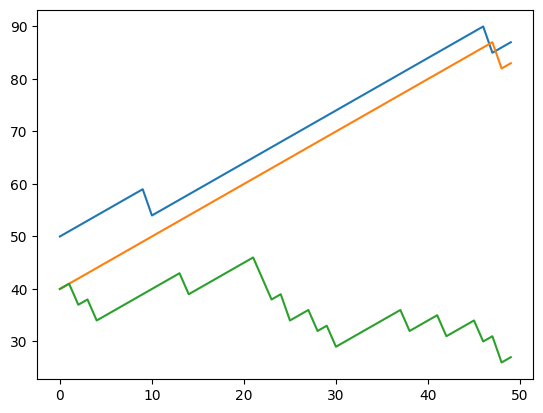

In [ ]:
plt.plot(user_scores_tendence["user_score_reading_insertion"])
plt.plot(user_scores_tendence["user_score_reading_skipping"])
plt.plot(user_scores_tendence["user_score_reading_phoneme"])

In [43]:
def is_relevant(prev, current, next):
    if next > current and current > prev:
        return False
    if next < current and current < prev:
        return False
    return True


relevance = [True]
for i in range(1, len(user_scores_tendence["user_score_reading_skipping"])-1):
    ins = user_scores_tendence["user_score_reading_insertion"]
    ski = user_scores_tendence["user_score_reading_skipping"]
    pho = user_scores_tendence["user_score_reading_phoneme"]
    relevance.append(is_relevant(ins[i-1], ins[i], ins[i+1]) or is_relevant(ski[i-1], ski[i], ski[i+1]) or is_relevant(pho[i-1], pho[i], pho[i+1]))
relevance.append(True)

presision_10 = []
for i in range(len(relevance)-10):
    presision_10.append(sum(relevance[i:i+10])/10)
mean_presision_10 = sum(presision_10) / len(presision_10)
print("mean_presision_10 = ", mean_presision_10)

mean_presision_10 =  0.45


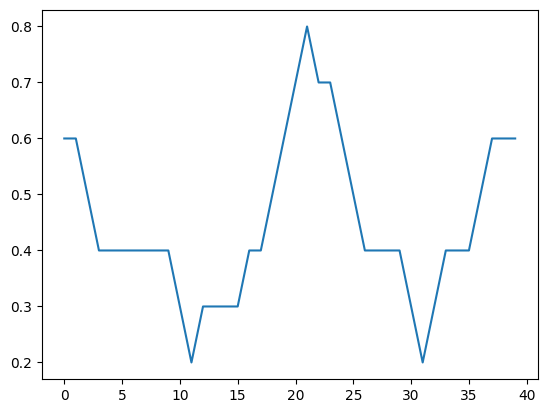

In [41]:
plt.plot(presision_10)

In [44]:
database.on_shutdown()